# PageRank 

In [1]:
import random
import time

In [2]:
PATH = "/Vrac/CPA-PageRank/"
FILE = "alr21--dirLinks--enwiki-20071018.txt"

## Exercice 1 - PageRank (directed graph) 

In [3]:
class Page(list):
    
    def __init__(self, index):
        list.__init__(self)
        self.index = index
        self.rank = 0
        self.next = 0
        
    def send(self, alpha):
        give = (1 - alpha)*self.rank/len(self)
        for page in self:
            page.next += give

In [4]:
class Network(list):
    
    def __init__(self, alpha, accuracy, verbose = False):
        list.__init__(self)
        self.number_of_pages = 0
        self.accuracy = accuracy
        self.alpha = alpha
        self.verbose = verbose
        
    def initialization(self):
        rank = 1/self.number_of_pages
        for page in self:
            if page == None: continue
            page.rank = rank
            page.next = rank*self.alpha
            
        if self.verbose:
            verification = 0
            for page in self:
                if page == None: continue
                verification += page.rank
            print("init : " + str(verification)) 
        print("INITIALIZATION... Ok!")
        
    def add_page(self, index):
        if index >= len(self):
            for i in range(len(self), index + 1):
                self.append(None)
            
        if self[index] == None: 
            self.number_of_pages += 1
            self[index] = Page(index)
      
    def add_pages_from(self, pages):
        for index in pages:
            self.add_page(index)
          
    def read(self, INPUT, reverse = False):
        iFile = open(INPUT, 'r')
        lines = iFile.read()[:-1].split('\n')
        while lines[0] == '' or lines[0][0] == '#': del lines[0]
        iFile.close()
        
        if lines[0].split(' ') == 2: SPACE = ' '
        else: SPACE = '\t'
            
        for line in lines:
            u, v = line.split(SPACE)
            self.add_pages_from([int(u), int(v)])
            if reverse: self[int(v)].append(self[int(u)])
            else: self[int(u)].append(self[int(v)])
        
        if False:
            print("number_of_pages", self.number_of_pages)
            for page in self:
                if page == None: continue
                print(">>","len(" + str(page.index) + ") =",len(page))
                for link in page:
                    print(link.index)
        print("READ... Ok!")
        
    
    def send(self):
        without_successor = 0
        for page in self:
            if page == None: continue
            if len(page) > 0: page.send(self.alpha)
            else: without_successor += (1 - self.alpha)*page.rank/(self.number_of_pages - 1)
        
        modification = False
        for page in self:
            if page == None: continue
            if len(page) != 0: page.next += without_successor
            else: page.next += without_successor - (1 - self.alpha)*page.rank/(self.number_of_pages - 1)
            factor = abs(page.rank/page.next)
            if factor < 1 - self.accuracy or factor > 1 + self.accuracy: modification = True
            page.rank, page.next = page.next, self.alpha*page.next
            
        if self.verbose:
            print("without_successor :", without_successor)
            verification = 0
            for page in self:
                if page == None: continue
                #print("page(" + str(page.index) + ") : " + str(page.rank))
                
                #if len(page) != 0: print("send(" + str(page.index) + ")",
                #                         "to " + " ".join([str(link.index) for link in page]),
                #                          ":",(1 - self.alpha)*page.rank/len(page))
                verification += page.rank
            print(verification)
        return modification
    
    def write(self, OUTPUT):
        oFile = open(OUTPUT, 'w')
        for page in self:
            if page == None: continue
            oFile.write(str(page.index) + '\t' + str(page.rank) + '\n')
        oFile.close()
    
    def count(self,n):
        print("SEND iteration n°" + str(n))
        return n+1
      
    def degree(self, INPUT, OUTPUT = None, reverse = False):
        if OUTPUT == None: 
            if reverse: OUTPUT = "PageRank_out_degree.data"
            else: OUTPUT = "PageRank_in_degree.data"
        self.read(INPUT, reverse)
        for page in self:
            if page == None: continue
            page.rank = len(page)
        self.write(OUTPUT)
        print("FINISHED")

    def PageRank(self, INPUT, OUTPUT = None, max_iteration = 10):
        if OUTPUT == None: OUTPUT = "PageRank_" + str(self.alpha) + ".data"
        self.read(INPUT)
        self.initialization()
        number_of_iteration = 0
        while self.send(): 
            number_of_iteration = self.count(number_of_iteration)
            if number_of_iteration == max_iteration: break
        self.write(OUTPUT) 
        print("FINISHED!")

In [63]:
def min_max(INPUT):
    file = open(INPUT, 'r')
    lines = file.read()[:-1].split('\n')
    if len(lines[0].split(' ')) == 2: SPACE = ' '
    else: SPACE = '\t'
    D = {}
    for line in lines:
        u, v = line.split(SPACE)
        D[int(u)] = float(v)
        
    MAXS = list(D.keys())[:5]
    MINS = list(D.keys())[:5]
    for key in D.keys():
        for i in range(len(MAXS)):
            if D[key] > D[MAXS[i]] and not key in MAXS:
                MAXS[i] = key
        for i in range(len(MINS)):
            if D[key] < D[MINS[i]] and not key in MINS:
                MINS[i] = key 
    print([(key,D[key]) for key in MAXS])
    print([(key,D[key]) for key in MINS])

In [12]:
if True:
    min_max("PageRank_0.15.data")

[12, 25, 39, 43, 290] [12, 25, 39, 43, 290]
[(3434750, 0.0035923560768492337), (5843419, 0.0015150148653637423), (36165, 0.0012821649306878125), (5042916, 0.0011898509674029443), (8569916, 0.0007688824354326122)]
[(632, 3.0477178212146385e-10), (679, 3.0477178212146385e-10), (951, 3.0477178212146385e-10), (964, 3.0477178212146385e-10), (1110, 3.0477178212146385e-10)]


## Exercice 2 - Correlations 

In [5]:
import matplotlib.pyplot as plt

INPUTS = [
    "PageRank_0.15.data", 
    "PageRank_0.1.data",
    "PageRank_0.2.data",
    "PageRank_0.5.data",
    "PageRank_0.9.data",
    "PageRank_in_degree.data",
    "PageRank_out_degree.data"
         ]

PLOTS = [
    "PageRank_0.15_0.1.data",
    "PageRank_0.15_0.2.data",
    "PageRank_0.15_0.5.data",
    "PageRank_0.15_0.9.data",
    "PageRank_0.15_in_degree.data",
    "PageRank_0.15_out_degree.data",
]

In [1]:
if False:
    Network(0.15,0.001).PageRank(FILE)
    Network(0.1,0.001).PageRank(FILE)
    Network(0.2,0.001).PageRank(FILE)
    Network(0.5,0.001).PageRank(FILE)
    Network(0.9,0.001).PageRank(FILE)
    Network(1,0.001).degree(FILE)
    Network(1,0.001).degree(FILE, reverse = True)

In [6]:
def read_names_file(INPUT):
    iFile = open(INPUT, 'r')
    lines = iFile.read()[:-1].split('\n')
    iFile.close()
    
    while lines[0] == '' or lines[0][0] == '#': del lines[0]
    if lines[0].split(' ') == 2: SPACE = ' '
    else: SPACE = '\t'
    
    N = {}
    for line in lines:
        u,s = line.split(SPACE)
        N[u] = s
    return N

In [7]:
def correlations(XY, inputs = INPUTS):  
    print(XY)
    for x,y in XY:
        xFile = open(inputs[x], 'r')
        yFile = open(inputs[y], 'r')
        oFile = open(inputs[x][:-5] + "_" + inputs[y][9:], 'w')
        
        xLines = xFile.read()[:-1].split('\n')
        yLines = yFile.read()[:-1].split('\n')
        
        if len(xLines[0].split(' ')) == 2: XSPACE = ' '
        else: XSPACE = '\t'
        if len(yLines[0].split(' ')) == 2: YSPACE = ' '
        else: YSPACE = '\t'
        j = 0
        for i in range(len(xLines)):
            oFile.write(xLines[i].split(XSPACE)[1] + XSPACE + yLines[i].split(YSPACE)[1] + '\n')
        xFile.close()
        yFile.close()
        oFile.close()
        

In [9]:
correlations([(0,x) for x in range(1,7)])

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)]


In [70]:
def ploter(INPUT):
    iFile = open(INPUT, 'r')
    lines = iFile.read()[:-1].split('\n')
    iFile.close()
    
    if len(lines[0].split(' ')) == 2: SPACE = ' '
    else: SPACE = '\t'
    
    X, Y = [], []
    _x, _y = 0, 0
    count = 0
    for line in lines:
        if line in ['\n', '']: continue
            
        if len(line.split(SPACE)) == 1: print("1",line.encode())
        x, y = line.split(SPACE)
        if len(x.split('.')) == 3: print("2",x.encode(),INPUT)
        if len(y.split('.')) == 3: print("3",y.encode(),INPUT)
        if len(x.split('+')) == 2:
            _x += float(x.split('+')[0][:-1]) * int(x.split('+')[1])
        else: _x += float(x)
        if len(y.split('+')) == 2:
            _y += float(y.split('+')[0][:-1]) * int(y.split('+')[1])
        else: _y += float(y)
        count += 1
        if count == 10:
            X.append(_x)
            Y.append(_y)
            _x, _y, count = 0, 0, 0
            
    plt.plot(X,Y,'ro')
    if len(INPUT.split('_')) == 3:
        plt.title("LOG\nx <- PageRank(alpha = 0.15) & y <- PageRank(ampha =" + INPUT.split('_')[2][:-5] + ")")
    else:
        plt.title("x <- PageRank(alpha = 0.15) & y <- " + INPUT.split('_')[2] + " degree")
    ax = plt.gca()
    plt.xscale("log", basex = 2)
    plt.savefig(INPUT[:-5] + "(log).png")
    plt.show()
    
    plt.plot(X,Y,'ro')
    if len(INPUT.split('_')) == 3:
        plt.title("LINEAR\nx <- PageRank(alpha = 0.15) & y <- PageRank(ampha =" + INPUT.split('_')[2][:-5] + ")")
    else:
        plt.title("x <- PageRank(alpha = 0.15) & y <- " + INPUT.split('_')[2] + " degree")
    ax = plt.gca()
    plt.xscale("linear")
    plt.savefig(INPUT[:-5] + "(linear).png")
    plt.show()

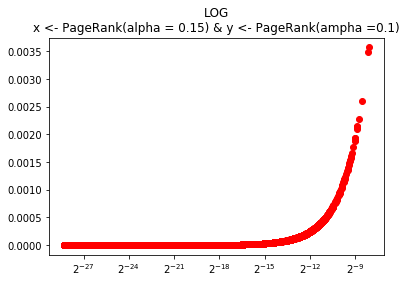

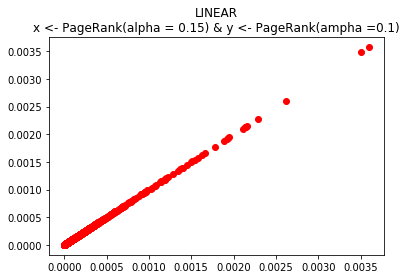

In [71]:
ploter(PLOTS[0])

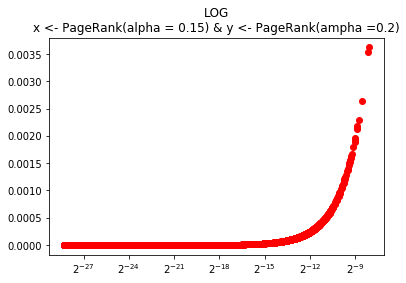

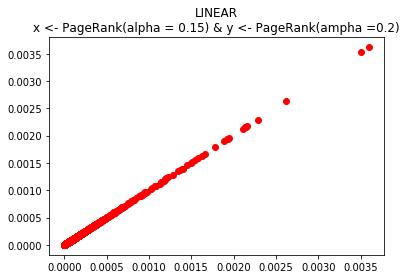

In [72]:
ploter(PLOTS[1])

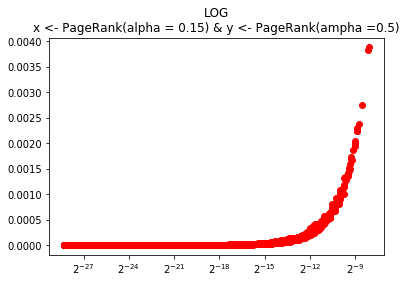

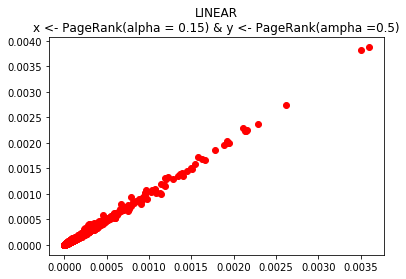

In [73]:
ploter(PLOTS[2])

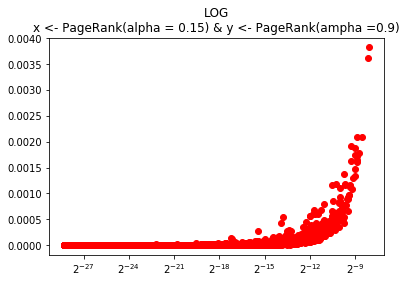

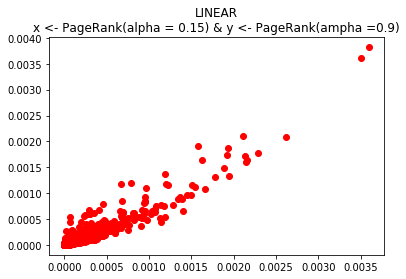

In [74]:
ploter(PLOTS[3])

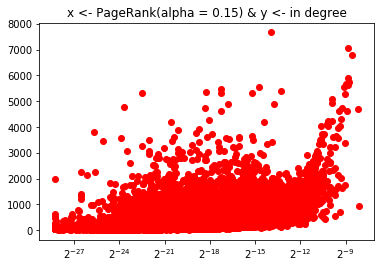

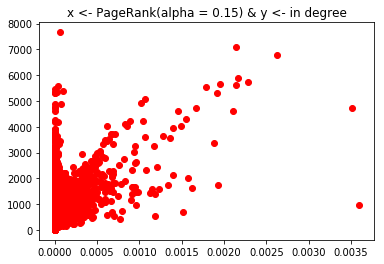

In [75]:
ploter(PLOTS[4])

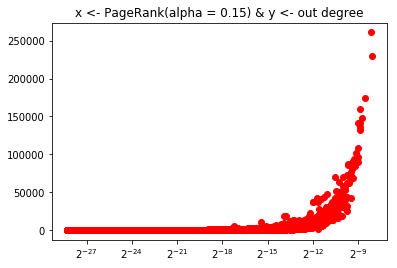

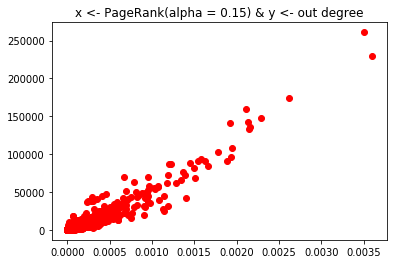

In [76]:
ploter(PLOTS[5])